In [12]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
'''

df = pd.read_csv(
    'files/results_pct_20201103.txt', sep=' ',header=None, error_bad_lines=False, keep_default_na=False)
df.head()
'''
# shrav already did it

"\n\ndf = pd.read_csv(\n    'files/results_pct_20201103.txt', sep=' ',header=None, error_bad_lines=False, keep_default_na=False)\ndf.head()\n"

In [3]:
#importation
df = pd.read_fwf('files/voter_stats_20201103.txt', error_bad_lines=False)
df = df['county_desc\telection_date\tstats_type\tprecinct_abbrv\tvtd_abbrv\tparty_cd\trace_code']
df = df.str.split(pat = '\t')

In [4]:
# type construction
final_data = [x for x in df]
final_data = np.array(final_data)
voter_data = pd.DataFrame(final_data)

In [24]:
#column renaming
# link to data map: https://s3.amazonaws.com/dl.ncsbe.gov/ENRS/layout_voter_stats.txt
#county_desc	election_date	stats_type	precinct_abbrv	vtd_abbrv	party_cd	race_code	ethnic_code	sex_code	age	total_voters	update_date
voter_data = voter_data.rename(columns={0: 'county_desc', 1: 'election_date', 2: 'stats_type', 3: 'precinct_abbrv', 4: 'vtd_abbrv', 5: 'party_cd', 6: 'race_code',
7: 'ethnic_code', 8: 'sex_code', 9: 'age', 10: 'total_voters', 11: 'update_date'})
voter_data.head()

,county_desc,election_date,stats_type,precinct_abbrv,vtd_abbrv,party_cd,race_code,ethnic_code,sex_code,age,total_voters,update_date
0,IREDELL,11/03/2020,voter,EM,EM,DEM,U,HL,M,Age 41 - 65,1,05/17/2021
1,GUILFORD,11/03/2020,voter,G60,G60,LIB,W,NL,M,Age 18 - 25,1,05/17/2021
2,WAKE,11/03/2020,voter,07-12,07-12,REP,W,UN,F,Age 41 - 65,12,05/17/2021
3,MOORE,11/03/2020,voter,RBN,RBN,UNA,U,UN,U,Age 26 - 40,6,05/17/2021
4,WAKE,11/03/2020,voter,19-18,19-10,UNA,A,NL,F,Age 26 - 40,8,05/17/2021


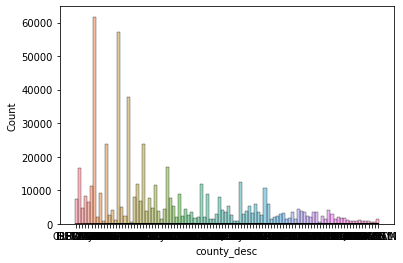

In [27]:
'''
# graphs
sns.histplot(data = voter_data, x = 'party_cd', hue = 'party_cd')

plt.figure()

sns.histplot(data = voter_data, x = 'race_code', hue = 'race_code')

plt.figure()

sns.histplot(data = voter_data, x = 'county_desc', hue = 'county_desc')
plt.legend([],[], frameon=False)
'''
sorted_total_voters = voter_data.sort_values('total_voters')

sns.histplot(data = sorted_total_voters, x = 'county_desc', hue = 'county_desc')
plt.legend([],[], frameon=False)

In [15]:
#sorted table for potential insertion 
sorted_voter_data = voter_data.sort_values('county_desc')
sorted_voter_data.head()

,county_desc,election_date,stats_type,precinct_abbrv,vtd_abbrv,party_cd,race_code,ethnic_code,sex_code,age,total_voters,update_date
490789,ALAMANCE,11/03/2020,voter,12W,12W,REP,W,UN,F,Age Over 66,16,05/17/2021
443156,ALAMANCE,11/03/2020,voter,10S1,10S,CST,W,NL,M,Age 41 - 65,1,05/17/2021
179249,ALAMANCE,11/03/2020,voter,10N,10N,DEM,U,UN,M,Age 41 - 65,2,05/17/2021
236765,ALAMANCE,11/03/2020,voter,06S,06S,UNA,U,UN,U,Age 41 - 65,27,05/17/2021
468318,ALAMANCE,11/03/2020,voter,103,103,REP,W,HL,F,Age 26 - 40,1,05/17/2021


In [16]:
# extraneous code
print(len(voter_data))

592717
